3.6.2

metro_res (metropolitain residence) - говорит о том, какой процент этого штата живет в столичной области.
white - процент белокожего населения этого штата 
hs_grad - процент людей, имеющих среднее образование
poverty - процент людей, проживающих в бедности
female_house - процент семей, где женщина является домохозяйкой

In [1]:
import pandas as pn
import matplotlib.pyplot as plt


In [2]:
import mystat as mst

In [3]:
df1 = pn.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

In [4]:
df1.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


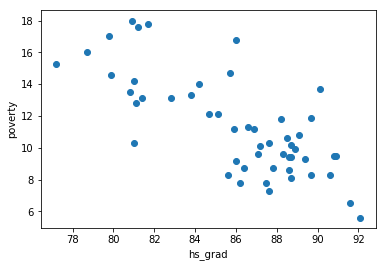

In [5]:
# Построение
x_axis = df1.hs_grad    # процент людей, имеющих среднее образование
#x_axis = df1.metro_res  # говорит о том, какой процент этого штата живет в столичной области.
#x_axis = df1.white      # процент белокожего населения этого штата 
#x_axis = df1.female_house #процент семей, где женщина является домохозяйкой
y_axis = df1.poverty  # poverty
plt.xlabel('hs_grad')
plt.ylabel('poverty')
plt.scatter(x_axis, y_axis)
plt.show()

In [6]:
# Статистика по списку значений
mst.show_list_stat(x_axis.tolist())

N =  51
Mean =  86.01176470588233
Variance =  13.883058823529407
Std Dev =  3.7259976950515425
Std Err =  0.5217440365514945


In [8]:
# Рассчитываю коэффициент ковариации cov, коэффициент корреляции r_xy
mst.covar(x_axis, y_axis)

covar:  -8.62438823529
r_xy:  -0.746858253158
shared variance:  0.557797250311
y =  64.7809657701 + -0.621216717794 x


In [13]:
# Расчет 
#import scipy as sp
from scipy import stats

In [17]:
import numpy as np

In [15]:
# First get the correlation value (pearson's)
r, p = stats.pearsonr(x_axis, y_axis)
print('r=', r, 'p =', p)


r= -0.746858253158 p = 3.10882981032e-10


In [19]:
# Use the Fisher transformation to get z
z = np.arctanh(r)
print('z=',z)

z= -0.96581228676


In [ ]:
# And, the sigma value i.e standard error

In [22]:
sigma = (1/((len(x_axis)-3)**0.5))
print('sigma =', sigma)

sigma = 0.14433756729740646


In [24]:
# confidence interval
# Get normal 95% interval probability density function 
# for normal continuous random variable apply two-sided conditional formula
cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
print('cint=', cint)

cint= [-1.24870872 -0.68291585]


In [26]:
stats.norm.ppf((1+0.95)/2)

1.959963984540054

In [10]:
print('Statisitic \t N\t Mean\t St.Dev.\t Min\t Max')
print('poverty', df1.poverty.count(), mst.mean(df1.poverty), mst.stand_dev(df1.poverty), df1.poverty.min(), df1.poverty.count().max())
print('hs_grad', df1.hs_grad.count(), mst.mean(df1.hs_grad), mst.stand_dev(df1.hs_grad), df1.hs_grad.min(), df1.hs_grad.count().max()) 

Statisitic 	 N	 Mean	 St.Dev.	 Min	 Max
poverty 51 11.3490196078 3.09918521867 5.6 51
hs_grad 51 86.0117647059 3.72599769505 77.2 51


Вычисление параметров функции

In [11]:
mean_x = df1.hs_grad.mean()
mean_y = df1.poverty.mean()

In [ ]:
df_t1 = df1.hs_grad
sum_x = df_t1.sum()
df_t1 = df_t1[:] ** 2
sum_x2 = df_t1.sum()

In [ ]:
df_t1 = df1[['hs_grad','poverty']]
df_t2 = pn.DataFrame()
df_t2['pow'] = df_t1['hs_grad'] * df_t1['poverty']
sum_xy = int(df_t2.sum())

In [ ]:
a = (sum_xy - mean_y * sum_x) / (sum_x2 - mean_x * sum_x)

In [ ]:
b = (mean_y * sum_x2 - mean_x * sum_xy) / (sum_x2 - mean_x * sum_x)

In [ ]:
print('y = ', b, '+', a, 'x')

In [ ]:
mean_x